# Introducción a modelos lluvia - escorrentía

Un **modelo lluvia-escorrentía** es un modelo de simulación conceptual agregado aplicado a una cuenca hidrográfica para estimar el hidrograma de respuesta a un evento de tormenta. 

En este notebook, vamos explorar varios modelos ampliamente utilizados para la estimación de la *precipitación efectiva* (o exceso de precipitación) que luego es transformada en escorrentía y transitada hasta la salida de la cuenca.

## Procesos de generación de escorrentía por eventos de tormenta

Los mecanismos físicos por los cuales el agua que es producida al nivel de superficie viaja hasta una corriente para generar un hidrograma, se pueden clasificar de la siguiente forma:

1. Precipitación sobre el canal<br>
2. Flujo superficial (escorrentía superficial)<br>
    1. Flujo superficial hortoniano<br>
    2. Flujo superficial de saturación (Dunne)<br>
3. Flujo subsuperficial<br>
    1. Flujo en la zona saturada<br>
        1. Flujo desde montículos de agua subterránea cerca a la corriente<br>
            1. Desarrollo gradual<br>
            2. Desarrollo súbito por presurizacion de la franja capilar<br>
        2. Flujo desde zonas saturadas adyacentes<br>
            1. Flujo mátrico (Darciano)<br>
            2. Flujo en macroporos<br>
    2. Flujo en la zona no saturada (no entra directamente a la superficie) <br>
        1. Flujo mátrico (Darciano)<br>
        2. Flujo en macroporos<br>

Por definición, la precipitación efectiva es la precipitación que no se retiene en la superficie terrestre y que tampoco se infiltra en el suelo. Después de fluir a través de la superficie de la cuenca, el exceso de precipitación se convierte en *escorrentía directa* a la salida de la cuenca. El agua que escurre en el suelo deja de infiltrarse porque el suelo se satura 1) desde arriba, cuando la intensidad de la lluvia excede la tasa de infiltración (*flujo superficial hortoniano*), o 2) desde abajo, cuando el nivel freático asciende hasta la superficie (*flujo superficial de saturación*).

### Flujo superficial hortoniano

Este mecanismo también se conoce como *escorrentía por exceso de infiltración*. El proceso de saturación desde arriba de un suelo inicialmente no saturado se modela como se muestra en la próxima sección. Cuando empieza el ingreso de agua a una tasa mayor a la conductividad hidráulica de la superficie, ocurre infiltración y se genera un frente húmedo que se mueve de forma descendente. Si el ingreso de agua persiste por tiempo suficiente, la superficie del suelo se satura, la infiltración se atenúa, y el agua que se acumula en la superficie empieza a correr pendiente abajo. El instante en el cual la saturación superficial ocurre se conoce como *tiempo de encharcamiento*.

***

Para que ocurra flujo superficial hortoniano se deben cumplir las siguientes condiciones:

1. La tasa de ingreso de agua (lluvia, riego) debe exceder la conductividad hidráulica de la superficie.
2. La duración de la tormenta debe exceder el tiempo de encharcamiento.

***

El flujo hortoniano es aplicable a superficies impermeables en áreas urbanas y a superficies naturales con capas delgadas de suelo y con baja capacidad de infiltración típicas de **zonas semiáridas y áridas**.

La respuesta a un evento de tormenta puede originar flujo superficial hortoniano en un *área de contribución* limitada de baja permeabilidad que varía de una cuenca a otra. Esta área se mantiene constante en una cuenca dada con excepción quizás durante eventos extremos.

<div>
<center><img src="Hortonian.png" width="500"/><center>
Figura 1. Flujo superficial hortoniano a lo largo de una pendiente de longitud $X_s$,<br> siendo $q_{ho}(X_s,t)$ el flujo lateral que ingresa en la corriente en el tiempo $t$
</div>

#### Contenido de humedad del suelo

Ahora, algunos conceptos básicos relacionados con el contenido de humedad en el suelo:

**Capacidad de campo**: Si un suelo está saturado y luego es drenado sin estar sujeto a evapotranspiración, su contenido de agua va a disminuir indefinidamente de una forma casi-exponencial, siguiendo la Ley de Darcy (suponiendo $z$ positivo hacia abajo):

$$q_z=-K_h(\theta)\left(\frac{\partial \psi} {\partial z}-1\right)$$

La capacidad de campo $\theta_{fc}$ es el contenido de agua para el cual la tasa de drenaje por gravedad es despreciable. Por lo tanto, es una medida de la cantidad de agua que el suelo puede contener en contra de la fuerza de gravedad. Cuando se alcanza este punto, el movimiento vertical prácticamente cesa y el volumen de agua solo puede ser reducido por evapotranspiración. Suponiendo una tasa de flujo límite $q_z=0.1$ mm/d, y usando las relaciones de van Genuchten, la capacidad de campo se puede estimar como:

$$\theta^*_{fc} = n^{-0.60[2 + \log_{10}(K_h)]}$$ <br>
$$\theta^*_{fc} = \frac{\theta^*_{fc} - \theta_r} {\theta - \theta_r}$$ <br>

**Punto de marchitamiento permanente**: En la naturaleza, el agua puede ser removida de un suelo que ha alcanzado su capacidad de campo por evaporación (exfiltración) o por absorción por parte de las plantas (transpiración). Sin embargo, hay un límite que varía por especie el cual limita la succión que una planta puede ejercer. Para propósitos hidrológicos, dicho límite se considera igual a -15,000 cm de agua o -1,470 kPa. Al alcanzar dicho límite, la evapotranspiración se detiene y las plantas se marchitan:

$$\theta_{wp}=\theta(\psi=-15,000 cm)$$

El anterior valor se puede calcular con las relaciones de van Genuchten.

**Estado de humedad del suelo**: La diferencia entre capacidad de campo y el punto de marchitamiento permanente se conoce como *contenido de agua disponible* $\theta_a$, el cual es considerado como la cantidad de agua disponible para el uso de las plantas.

$$\theta_a=\theta_{fc}-\theta_{wp}$$

<div>
<center><img src="awc.png" width="800"/><center>
Figura 2. Estado de humedad del suelo en función del potencial mátrico (tensión)
</div>

#### Modelación del proceso de infiltración

La infiltración es el proceso por el cual el agua que llega a la superficie del suelo entra al suelo. Por simplicidad, en esta sección se presentan ecuaciones asumiento infiltración en un punto y suelos homogéneos sin macroporos. Así mismo, se ignora el flujo de aire hacia arriba, y efectos por gradientes térmicos y osmóticos. Las ecuaciones que describen este proceso, generalmente incluyen los siguientes términos:

* **Tasa de entrada del agua**, $w(t)$ [L T$^{-1}$]: tasa a la cual el agua llega a la superficie debido a la lluvia, derretimiento de nieve, o riego. Un evento de entrada de agua ocurre entre el tiempo $t=0$ y $t=T_w$.
* **Tasa de infiltración**, $f(t)$ [L T$^{-1}$]: tasa a la cual el agua entra al suelo desde la superficie.
* **Capacidad de infiltración o tasa de infiltración potencial**, $f^*(t)$ [L T$^{-1}$]: tasa máxima a la cual ocurre infiltración en cualquier momento y que puede cambiar durante el evento de infiltración.
* **Pronfundidad de encharcamiento**, $H(t)$ [L]: profundidad del agua que se mantiene en la superficie.

Hay tres condiciones típicas bajo las cuales se desarrolla el proceso de infiltración:

1. **Sin encharcamiento**: Controlada por suministro o flujo, $H(t)=0, f(t)=w(t) ≤ f^*(t)$
2. **Saturación desde arriba**: Encharcamiento presente. La tasa de infiltración se determina por el tipo de suelo y humedad, siendo controlada por el perfil de suelo, $H(t)>0, f(t)=f^*(t) ≤ w(t)$
3. **Saturación desde abajo**: Encharcamiento presente porque el nivel freático alcanza o excede la superficie, $H(t)≥0, f(t)=f^*(t)=0$

Entre los factores que afectan la infiltración están:
- Tasa de entrada de agua y profundidad de encharcamiento
- Conductividad hidráulica en la superficie, la cual a su vez depende de:
    * Capas orgánicas superficiales
    * Escarcha (*frost*)
    * Expansión-contracción
    * Compactación superficial por lluvia
    * Lavado e ingreso de sedimentos finos
    * Modificación humana
- Contenido de humedad en los poros superficiales
- Pendiente de la superficie y rugosidad
- Características químicas de la superficie del suelo
- Propiedades físicas y químicas del agua

#### Ecuaciones que describen el proceso de infiltración

La ecuación de Richards es la base de modelación numérica por excelencia, la cual permite simular procesos de infiltración, exfiltración, y redistribución del agua en el suelo al definir condiciones iniciales y de frontera apropiadas. 

Debido a la demanda computacional que requiere su solución numérica, los modelos hidrológicos suelen incorporar aproximaciones más simples, algunas de las cuales se presentan a continuación.

##### Ecuación de Horton

Una de las primeras ecuaciones de infiltración fue desarrollada por Horton (1933, 1939), quien observó que la infiltración empieza en alguna tasa $f_0$ y decrece exponencialmente hasta alcanzar una tasa constante $f_c$:

$$f^*(t)=f_c + (f_0 - f_c)e^{-kt}$$

siendo $k$ la tasa de decaimiento con unidades de [T$^{-1}$]. La ecuación de Horton se puede derivar de la ecuación de Richards basada en el contenido de humedad suponiendo solo efectos de capilaridad (lo cual es válido en las capas superiores, especialmente al inicio del proceso de infiltración en suelos inicialmente secos) y tasas de difusividad $D(\theta)$ y de conductividad hidráulica $K(\theta)$ constantes:

$$\frac {\partial \theta} {\partial t}=D(\theta) \frac {\partial^2 \theta} {\partial z^2}$$<br>
$$ D(\theta) = K(\theta) \frac {\partial \psi} {\partial z}$$

##### Ecuación de Philip

Philip (1957, 1969) resolvió la ecuación de Richards para un suelo infinitamente profundo suponiendo que $K$ y $D$ varían con el contenido de humedad $\theta$ usando la transformada de Boltzmann para convertir la ecuación de Richards basada en $\theta$ en una ecuación diferencial ordinaria basada en $B$:

$$ B(\theta)=zt^{-1/2}$$ <br>

$$\frac {d} {dB} \left[D(\theta) \frac {d \theta} {dB} \right] + \frac {B} {2} \frac {d\theta} {dB} = 0$$<br>

Philip resolvió la anterior ecuación mediante una serie infinita que describe la infiltración acumulada $F(t)$ (típicamente se utilizan solo los dos primeros términos de la expansión):

$$F(t)=\int_{0}^{t} f(\tau)d\tau$$<br>
$$F(t)=S_pt^{1/2}+K_pt$$<br>
$$f(t)=\frac {1}{2}S_pt^{-1/2}+K_p$$<br>

En las anteriores ecuaciones, $S_p$ es la adsorción y $K_p$ es la conductividad hidráulica. Nótese que cuando $t \rightarrow \infty, f(t)=K_p$. La ecuación de Philip es la solución exacta de la ecuación de Richards solo cuando $K(\theta)$ es una función lineal de $\theta$ y $H(t)$ aumenta proporcionalmente con $t^{1/2}$, las cuales son condiciones irreales.

#### Problema 1

Se tienen los siguientes datos de infiltración acumulada en el tiempo obtenidos con un infiltómetro:

In [327]:
import pandas as pd

opt = 'soil2'

if opt == 'soil1':
    tobs = [0,1,2,4,6,10,20,30,60,120,180,240,360,480,600,960,1140,1320,1480] # tiempo en minutos
    Fobs = [0,4,5,6,7,8,10,11,14,18,21,24,29,34,38,50,56,61,65] # infiltración acumulada en mm
elif opt == 'soil2':
    tobs = [0,1,2,4,7,11,19,30,39,54,74,94,114,135,157,174]
    Fobs = [0,3.3,4.5,6.2,8.2,11,14.8,20.7,24.4,29.9,37.1,43.5,49.7,55.6,61.9,66.7]

data = pd.DataFrame({'tobs':tobs, 'Fobs':Fobs})

A partir de estos datos experimentales, determine los parámetros de la ecuación de Horton y de Philip, y grafique las curvas simuladas y los datos observados.

#### Funciones

In [328]:
import numpy as np
import matplotlib.pyplot as plt

def horton(t, f0, fc, k):
    f = fc + (f0 - fc) * np.exp(-k*t)
    F = fc * t + (f0 - fc)/k * (1 - np.exp(-k*t))
    return({'f':f, 'F':F})

def philip(t, Sp, Kp):
    f = 0.5 * Sp * t ** (-0.5) + Kp
    F = Sp * t ** (0.5) + Kp * t
    return({'f':f, 'F':F})

def rmse(obs, sim):
    res = obs - sim
    rmse = np.sqrt(res.dot(res)/len(res))
    return rmse

### Simulaciones de Monte Carlo

In [329]:
def monte_carlo(params, fun_name, tout='tobs', Fout='Fobs'):
    F_out = []
    rmse_out = []
    for param in params:
        F_i = globals()[fun_name](data[tout], *param).get('F')
        rmse_i = rmse(data[Fout], F_i)
        F_out = F_out + [F_i]
        rmse_out = rmse_out + [rmse_i]

    F_out = np.array(F_out)
    rmse_out = np.array(rmse_out)

    best_rmse = np.min(rmse_out)
    best_params = params[np.where(rmse_out == best_rmse)][0]
    
    return best_params, best_rmse

In [330]:
# Rangos de calibración - Modelo de Philip
Sp_range = [0.2, 5]
Kp_range = [0.0001, 0.5]

# Rangos de calibración - Modelo de Horton
f0_range = [1, 5]
fc_range = [0, 0.5]
k_range  = [0, 5]

nsim = 10000 # Número de simulaciones de Monte Carlo
seed = 12345 # Semilla generador aleatorios - reproducibilidad
rng = np.random.default_rng(seed) # Generador de números aleatorios

params_philip = rng.uniform([Sp_range[0], Kp_range[0]], [Sp_range[1], Kp_range[1]], (nsim, 2))
params_horton = rng.uniform([f0_range[0], fc_range[0], k_range[0]], [f0_range[1], fc_range[1], k_range[1]], (nsim, 3))

best_params_philip, best_rmse_philip = monte_carlo(params_philip, 'philip')
best_params_horton, best_rmse_horton = monte_carlo(params_horton, 'horton')

Mejor estimación - Philip: Sp = 2.81 mm/min^0.5, Kp = 0.169 mm/min, rmse = 0.29 mm
Mejor estimación - Horton: f0 = 1.64 mm/min, fc = 0.324 mm/min, k = 0.12 min^-1, rmse = 1.09 mm


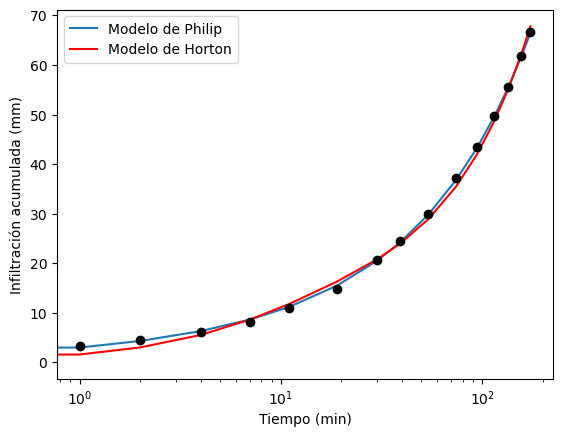

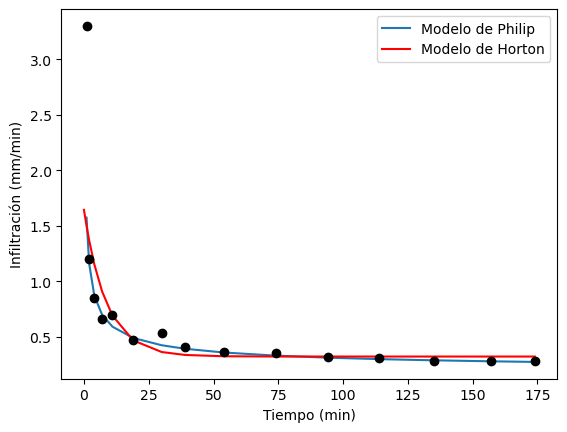

In [331]:
Sp = best_params_philip[0]
Kp = best_params_philip[1]
f0 = best_params_horton[0]
fc = best_params_horton[1]
k  = best_params_horton[2]

print(f'Mejor estimación - Philip: Sp = {Sp:3.2f} mm/min^0.5, Kp = {Kp:3.3} mm/min, rmse = {best_rmse_philip:3.2f} mm')
print(f'Mejor estimación - Horton: f0 = {f0:3.2f} mm/min, fc = {fc:3.3f} mm/min, k = {k:3.2f} min^-1, rmse = {best_rmse_horton:3.2f} mm')

# Soluciones (mejor ajuste)
Fp = philip(data['tobs'],Sp,Kp).get('F')
Fh = horton(data['tobs'],f0,fc,k).get('F')

# Gráfica - valores acumulados
plt.plot(tobs, Fp, label='Modelo de Philip')
plt.plot(tobs, Fh,'r',label='Modelo de Horton')
plt.plot(tobs,Fobs, 'ko') 
plt.xscale('log')
plt.xlabel('Tiempo (min)')
plt.ylabel('Infiltración acumulada (mm)')
plt.legend()
plt.show()

# Gráfica - valores instantáneos
fp = philip(data['tobs'],Sp,Kp).get('f')
fh = horton(data['tobs'],f0,fc,k).get('f')
fobs = np.diff(data['Fobs'])/np.diff(data['tobs'])
tobs1 = np.array(data['tobs'])[1:]

plt.plot(tobs, fp, label='Modelo de Philip')
plt.plot(tobs, fh,'r',label='Modelo de Horton')
plt.plot(tobs1,fobs, 'ko')
plt.xlabel('Tiempo (min)')
plt.ylabel('Infiltración (mm/min)')
plt.legend()
plt.show()